In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data set

In [16]:
data = pd.read_excel('C:/Users/Ashif/Downloads/iris.xls')

In [17]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing

In [19]:
#Checking the Null values of the given dataset
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [20]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# filling null value with median

In [21]:
for features in ['SL','SW','PL']:
    data[features]=data[features].fillna(data[features].median())

In [22]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [25]:
#checking basic details of the dataset
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.shape

(150, 5)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling outliers of the dataset

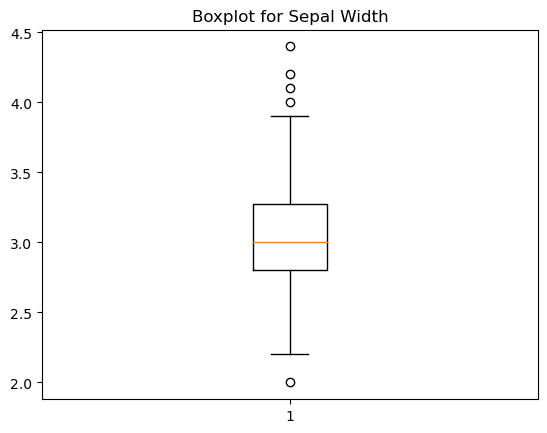

In [29]:
plt.boxplot(data['SW'])
plt.title('Boxplot for Sepal Width')
plt.show()

In [30]:
Q1 = np.percentile(data['SW'],25)
Q2 = np.percentile(data['SW'],50)
Q3 = np.percentile(data['SW'],75)
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
upr_limit = Q3 + 1.5*IQR
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
print('IQR=',IQR)
print('Lower Limit :',low_limit)
print('Upper Limit :',upr_limit)

Q1= 2.8
Q2= 3.0
Q3= 3.275
IQR= 0.4750000000000001
Lower Limit : 2.0874999999999995
Upper Limit : 3.9875


In [31]:
outlier =[]
for x in data['SW']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [32]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [33]:
ind1 = data['SW']>upr_limit
ind2 = data['SW']<low_limit

In [34]:
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [35]:
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [36]:
#dropping the outliers based on index
data.drop([60,14,15,32,33],inplace = True)

In [37]:
data.shape

(145, 5)

# Applying Classification Algorithms

In [38]:
## to count the values of categorical feature
data['Classification'].value_counts(normalize = True)

Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: Classification, dtype: float64

In [40]:
## label encoding categorical features
## import label encoder from scikit learn libraries 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [41]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


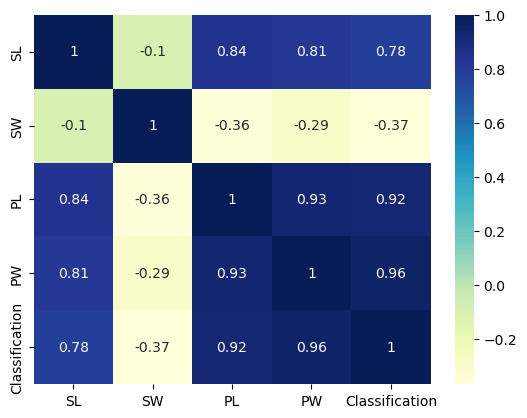

In [44]:
#find the correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'YlGnBu')
plt.show()

In [45]:
x = data.drop('Classification',axis=1) ##independent variable
y = data['Classification'] ##target variable

In [46]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int64

In [48]:
##splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [49]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
type(x_train_scaled)

numpy.ndarray

In [51]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [52]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial',solver ='lbfgs',max_iter = 1000)
model = lr.fit(x_train_scaled_df,y_train)
y_pred = model.predict(x_test_scaled_df)

In [53]:
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0],
      dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  3, 15]], dtype=int64)

In [55]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average = None))
print('Recall = ',recall_score(y_test,y_pred,average = None))
print('F1 score = ',f1_score(y_test,y_pred,average = None))

Accuracy =  0.9318181818181818
Precision =  [1.         0.78571429 1.        ]
Recall =  [1.         1.         0.83333333]
F1 score =  [1.         0.88       0.90909091]


# KNN Regression

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
metric_k = []
neighbors = np.arange(3,15)

In [61]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k,metric ='euclidean')
    classifier.fit(x_train_scaled_df,y_train)
    y_predictions = classifier.predict(x_test_scaled_df)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [62]:
metric_k

[0.9318181818181818,
 0.9090909090909091,
 0.9090909090909091,
 0.8863636363636364,
 0.9090909090909091,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364,
 0.8863636363636364]

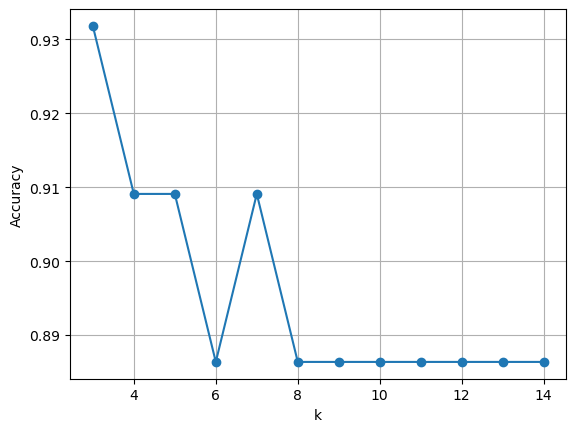

In [63]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [64]:
classifier = KNeighborsClassifier(n_neighbors =5,metric ='euclidean')
classifier.fit(x_train_scaled_df,y_train)
y_predictions = classifier.predict(x_test_scaled_df)

In [65]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions,average = None))
print('Recall = ',recall_score(y_test,y_predictions,average = None))
print('F1 score = ',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)

Accuracy =  0.9090909090909091
Precision =  [1.         0.76923077 0.9375    ]
Recall =  [1.         0.90909091 0.83333333]
F1 score =  [1.         0.83333333 0.88235294]


array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  3, 15]], dtype=int64)

# SVM

In [66]:
from sklearn.svm import SVC
svmc1f = SVC(kernel = 'linear')
svmc1f.fit(x_train_scaled_df,y_train)

SVC(kernel='linear')

In [67]:
y_pred1 = svmc1f.predict(x_test_scaled_df)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred1))

Accuracy is 0.9318181818181818


In [69]:
print(confusion_matrix(y_test,y_pred1))

[[15  0  0]
 [ 0 10  1]
 [ 0  2 16]]


# Decision Tree and Random Forest Classifier

In [70]:
## Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_scaled_df,y_train)

DecisionTreeClassifier()

In [71]:
y_pred2 = dt_clf.predict(x_test_scaled_df)

In [72]:
print('Accuracy is',accuracy_score(y_test,y_pred2))

Accuracy is 0.9090909090909091


In [73]:
print(confusion_matrix(y_test,y_pred2))

[[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
y_pred3 = rf_clf.predict(x_test_scaled_df)

In [76]:
print('Accuracy is',accuracy_score(y_test,y_pred3))

Accuracy is 0.3409090909090909


In [77]:
print(confusion_matrix(y_test,y_pred3))

[[15  0  0]
 [11  0  0]
 [ 8 10  0]]


# Hyper Parameter Tuning

In [78]:
rf_clf1=RandomForestClassifier(n_estimators =20,max_depth =20,criterion ='entropy',min_samples_split =3)
rf_clf1.fit(x_train_scaled_df,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [79]:
y_pred4 = rf_clf1.predict(x_test_scaled_df)

In [80]:
print('Accuracy is',accuracy_score(y_test,y_pred4))

Accuracy is 0.9090909090909091


An accuracy score of 0.9 was consistently observed when applying various Classification Algorithms to the given Iris dataset, except for certain instances with Logistic Regression. This score indicates that the model accurately predicted the target variable for 90% of the samples in the dataset. Consequently, the model demonstrated strong performance in classifying the iris flowers into their respective species.